# Dimer Plot

5.455003819900558


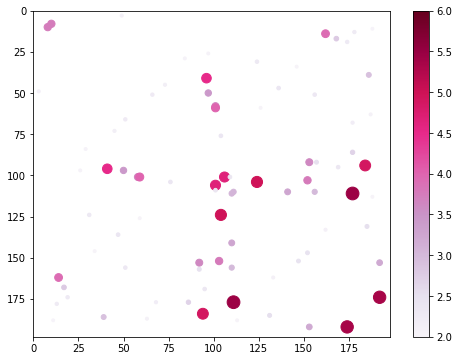

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
import math

Experiment = 14
Library = 1

#fig, ax = plt.subplots(1)
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot()

X, Y = np.meshgrid(np.arange(1, 193), np.arange(1, 193))
X = X.flatten()
Y = Y.flatten()

# load dimer mat 
dimer = loadmat('E14_L1_dimer.mat')
DIMER = dimer.get('dimer')
New_all3 = np.zeros( (192, 192) )
Length = loadmat('E14_L1_ReadsLength.mat');
total = sum(sum(Length.get('Length')))


for i in range(192):
        for j in range(192):
                New_all3[i,j] = (DIMER[i,j] + DIMER[j,i]) / total * 1000000;
D = np.log10(New_all3.flatten()+0.1) 

X_new = []
Y_new = []
D_new = []
for i in range(len(D)):
    if D[i] >= 2:
        X_new.append(X[i])
        Y_new.append(Y[i])
        D_new.append(D[i])
        
D_new_scaler = [i*i*i for i in D_new]
print(max(D_new))

p = ax.scatter(X_new, Y_new, c=D_new, s=D_new_scaler, cmap='PuRd', vmin = 2,  vmax = 6, alpha = 1)
plt.xlim(0, 198)
plt.ylim(0, 198)
plt.gca().invert_yaxis()

fig.colorbar(p)
plt.savefig('E14_Lib1_dimer_201215.svg')
plt.show()

# Non specific plot

3.9797503900786486


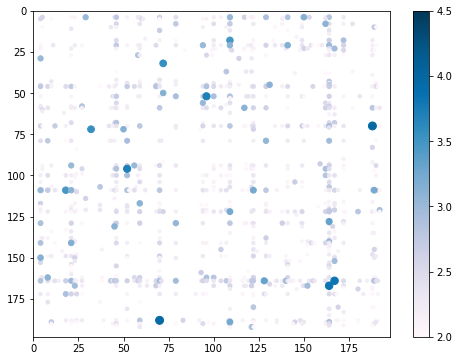

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
import math

Experiment = 14
Library = 3

#fig, ax = plt.subplots(1)
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot()

X, Y = np.meshgrid(np.arange(1, 193), np.arange(1, 193))
X = X.flatten()
Y = Y.flatten()

# load dimer mat 
dimer = loadmat('E14_L3_NS.mat')
DIMER = dimer.get('others')
New_all3 = np.zeros( (192, 192) )
Length = loadmat('E14_L3_ReadsLength.mat');
total = sum(sum(Length.get('Length')))

for i in range(192):
        for j in range(192):
                New_all3[i,j] = (DIMER[i,j] + DIMER[j,i]) / total * 1000000 ;
D = np.log10(New_all3.flatten()+0.1)

X_new = []
Y_new = []
D_new = []
X_Low = []
Y_Low = []
D_Low = []
X_High = []
Y_High = []
D_High = []
for i in range(len(D)):
    if D[i] >= 2 and D[i] <=3 :
        X_Low.append(X[i])
        Y_Low.append(Y[i])
        D_Low.append(D[i])
    elif D[i] > 3:
        X_High.append(X[i])
        Y_High.append(Y[i])
        D_High.append(D[i])
    
    X_new = X_Low + X_High
    Y_new = Y_Low + Y_High
    D_new = D_Low + D_High
       
        
D_new_scaler = [i*i*i for i in D_new]
p = ax.scatter(X_new, Y_new, c=D_new, s=D_new_scaler, cmap='PuBu', vmin = 2,  vmax = 4.5, alpha = 1)
plt.xlim(0, 198)
plt.ylim(0, 198)
plt.gca().invert_yaxis()

print(max(D_new))

fig.colorbar(p)
plt.savefig('E14_Lib3_NS.svg')
plt.show()